In [1]:
import scipy.io as spio
import matplotlib.pyplot as plt

In [2]:
matdata = spio.loadmat('motor_cortex_data.mat')

In [3]:
neuronsData =matdata['spk_rast'][0]

In [4]:
def plotNeuron(neuronData,n):
    u,ul,l,dl,d,dr,r,ur=[],[],[],[],[],[],[],[]
    for dat,td in zip(list(neuronData[0]),list(neuronData[1])):#trie_dir
        
        if td[1]>0 and td[0]==0:#up
            u.append(dat)
        elif td[1]<0 and td[0]==0:#down
            d.append(dat)
        elif td[1]==0 and td[0]>0:#right
            r.append(dat)
        elif td[1]==0 and td[0]<0:#left
            l.append(dat)
        elif td[1]>0 and td[0]<0:#up left
            ul.append(dat)
        elif td[1]>0 and td[0]>0:#up right
            ur.append(dat)
        elif td[1]<0 and td[0]<0:#down left
            dl.append(dat)
        elif td[1]<0 and td[0]>0:#down right
            dr.append(dat)
    plt.figure(figsize=(15,10)) 
    
    #up left
    plt.subplot(3, 3, 1)
    plt.xlim((0,1))
    plt.ylim((0,20))
    plt.eventplot(ul)
    #up 
    plt.subplot(3, 3, 2)
    plt.xlim((0,1))
    plt.ylim((0,20))
    plt.eventplot(u)
    #up right 
    plt.subplot(3, 3, 3)
    plt.xlim((0,1))
    plt.ylim((0,20))
    plt.eventplot(ur)

    #left
    plt.subplot(3, 3, 4)
    plt.xlim((0,1))
    plt.ylim((0,20))
    plt.eventplot(l)
    
    
    #center
    
    plt.subplot(3, 3, 5)
    plt.title('Neurona %d'%n)
    plt.xlim((-1.1,1.1))
    plt.ylim((-1.1,1.1))
    plt.plot([0],[1],'o',label="u")
    plt.plot([0],[-1],'o',label="d")
    plt.plot([-1],[0],'o',label="l")
    plt.plot([1],[0],'o',label="r")
    plt.plot([-.7],[.7],'o',label="ul")
    plt.plot([.7],[.7],'o',label="ur")
    plt.plot([-.7],[-.7],'o',label="dl")
    plt.plot([.7],[-.7],'o',label="dr")
    plt.legend(loc='center')
    
    #right 
    plt.subplot(3, 3, 6)
    plt.xlim((0,1))
    plt.ylim((0,20))
    plt.eventplot(r)

    #down left
    plt.subplot(3, 3, 7)
    plt.xlim((0,1))
    plt.ylim((0,20))
    plt.eventplot(dl)
    #down 
    plt.subplot(3, 3, 8)
    plt.xlim((0,1))
    plt.ylim((0,20))
    plt.eventplot(d)
    #down right 
    plt.subplot(3, 3, 9)
    plt.xlim((0,1))
    plt.ylim((0,20))
    plt.eventplot(dr)
    plt.savefig("neurona%d.png"%i)
    plt.show()

In [5]:
#neurona 1 abajo?
#neurona 4 tiene preferencia hacia la Arriba √
#neurona 5 pareciera tener una leve preferencia hacia derecha?
#neurona 7 abajo leve derecha
#neurona 12 tiene preferencia hacia derecha leve arriba
#neurona 13 tiene preferencia abajo leve izquierda
#neurona 15 pareciera tender a la izquierda pero muy difuso
#neurona 17 tiene preferencia izquierda √
#neurona 18 tiene preferencia arriba, leve izquierda
#neurona 21 tiene una muy marcada prefercia hacia abajo
#neurona 24 pareciera tener cierta tendencia hacia abajo derecha
#neurona 26 difuso pero con una cierta tendencia hacia abajo

Neurona 4


/Users/nestormoramenares/venv/lib/python2.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


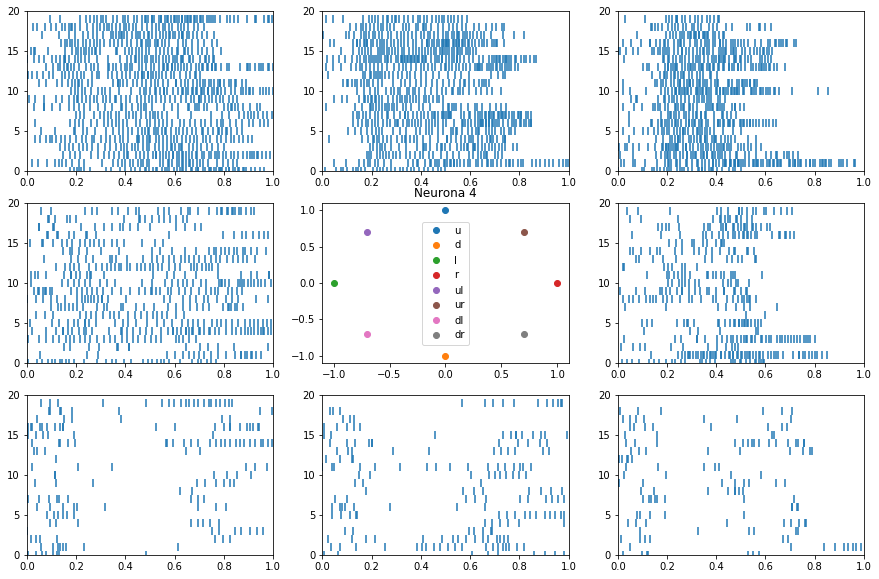

Neurona 17


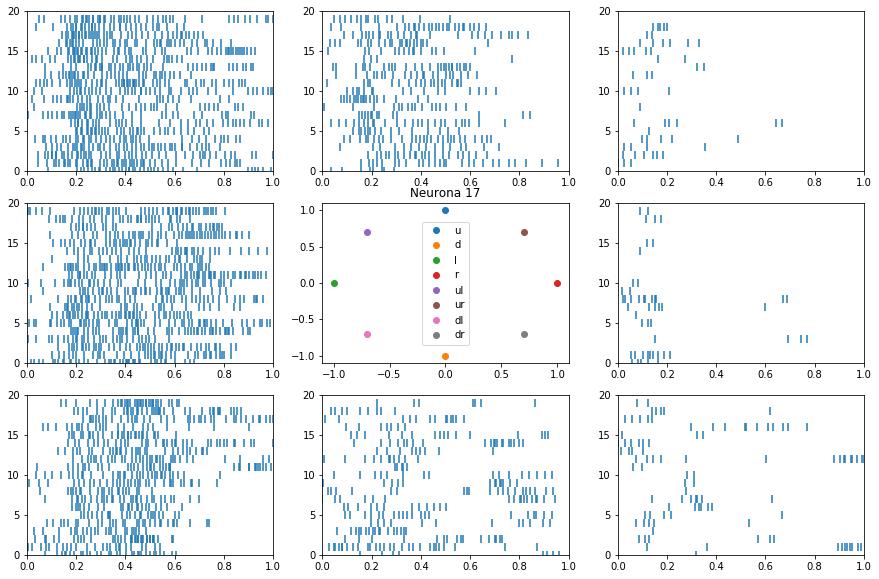

In [6]:
import time
from IPython.display import clear_output

for i in [4,17]:
    #clear_output()
    print "Neurona %d"%i
    plotNeuron(neuronsData[i],i)
    time.sleep(2)

In [38]:
import numpy as np
def FR(neuronData):
    u,ul,l,dl,d,dr,r,ur=[],[],[],[],[],[],[],[]
    for dat,td in zip(list(neuronData[0]),list(neuronData[1])):#trie_dir
        if td[1]>0 and td[0]==0:#up
            u.append(len(filter(lambda d:d>0,dat))/filter(lambda d:d>0,dat)[-1] if len(filter(lambda d:d>0,dat))>0 else 0) 
        elif td[1]<0 and td[0]==0:#down
            d.append(len(filter(lambda d:d>0,dat))/filter(lambda d:d>0,dat)[-1] if len(filter(lambda d:d>0,dat))>0 else 0)
        elif td[1]==0 and td[0]>0:#right
            r.append(len(filter(lambda d:d>0,dat))/filter(lambda d:d>0,dat)[-1] if len(filter(lambda d:d>0,dat))>0 else 0)
        elif td[1]==0 and td[0]<0:#left
            l.append(len(filter(lambda d:d>0,dat))/filter(lambda d:d>0,dat)[-1] if len(filter(lambda d:d>0,dat))>0 else 0)
        elif td[1]>0 and td[0]<0:#up left
            ul.append(len(filter(lambda d:d>0,dat))/filter(lambda d:d>0,dat)[-1] if len(filter(lambda d:d>0,dat))>0 else 0)
        elif td[1]>0 and td[0]>0:#up right
            ur.append(len(filter(lambda d:d>0,dat))/filter(lambda d:d>0,dat)[-1] if len(filter(lambda d:d>0,dat))>0 else 0)
        elif td[1]<0 and td[0]<0:#down left
            dl.append(len(filter(lambda d:d>0,dat))/filter(lambda d:d>0,dat)[-1] if len(filter(lambda d:d>0,dat))>0 else 0)
        elif td[1]<0 and td[0]>0:#down right
            dr.append(len(filter(lambda d:d>0,dat))/filter(lambda d:d>0,dat)[-1] if len(filter(lambda d:d>0,dat))>0 else 0)
    samples = [np.mean(r),np.mean(ur),np.mean(u),np.mean(ul),np.mean(l),np.mean(dl),np.mean(d),np.mean(dr)]
    return samples

In [39]:
from scipy import optimize


def fit(x, y):
    params, params_covariance = optimize.curve_fit(lambda x,a,b,c: a * np.cos(x-b) + c , x, y,bounds=((0,0,-np.inf),(np.inf,2*np.pi,np.inf)))
    return params, params_covariance
def AnguloPreferencia(neuronData):
    samples = FR(neuronData)
    theta = np.array(np.linspace(0,7*np.pi/4,8))
    params, covariance = fit(theta, samples)
    return params


In [40]:
AnguloPreferencia(neuronsData[1])

array([10.26353203,  4.90353833, 27.09022557])

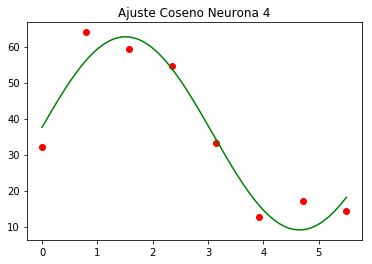

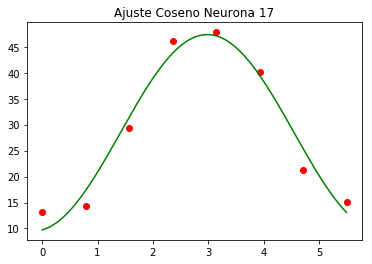

In [41]:
for i in [4,17]:
    plt.title("Ajuste Coseno Neurona %d"%i)
    sample = FR(neuronsData[i])
    theta = np.array(np.linspace(0,7*np.pi/4,8))
    amp,fase ,b0 = AnguloPreferencia(neuronsData[i])
    plt.plot(theta,sample,'ro')
    plt.plot(np.linspace(0,7*np.pi/4,1000),np.cos(np.linspace(0,7*np.pi/4,1000)-fase)*amp+b0,'g')
    plt.savefig("CosineTunning%d.png"%i)
    plt.show()
    


In [42]:
def cart2pol(x, y):
    """Convert from Cartesian to polar coordinates.

    Example
    -------
    >>> theta, radius = pol2cart(x, y)
    """
    radius = np.hypot(x, y)
    theta = np.arctan2(y, x)
    return theta, radius
def compass(u, v, arrowprops=None):
    """
    Compass draws a graph that displays the vectors with
    components `u` and `v` as arrows from the origin.

    Examples
    --------
    >>> import numpy as np
    >>> u = [+0, +0.5, -0.50, -0.90]
    >>> v = [+1, +0.5, -0.45, +0.85]
    >>> compass(u, v)
    """

    angles, radii = cart2pol(u, v)
    
    fig, ax = plt.subplots(subplot_kw=dict(polar=True))
    fig.set_figheight(10)
    fig.set_figwidth(10)
    kw = dict(arrowstyle="->", color='r')
    if arrowprops:
        kw.update(arrowprops)
    [ax.annotate("", xy=(angle, radius), xytext=(0, 0),
                 arrowprops=kw) for
     angle, radius in zip(angles, radii)]

    ax.set_ylim(0, 1)

    return fig, ax

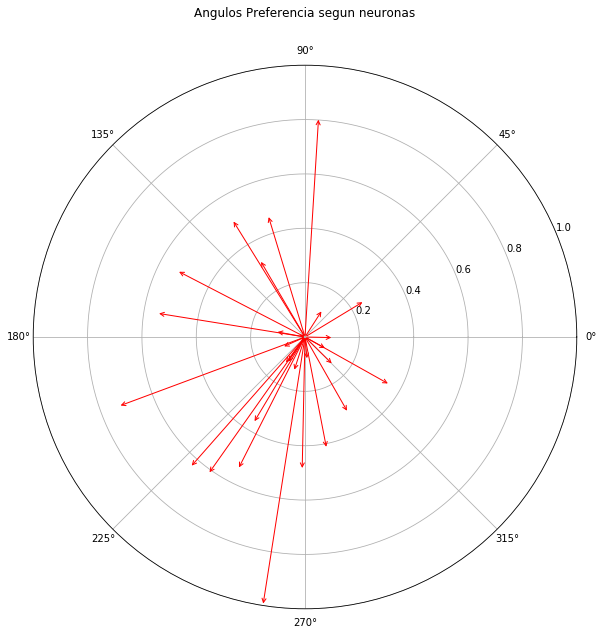

In [43]:
fr = [np.max(FR(nd)) for nd in neuronsData]
frs = [FR(nd) for nd in neuronsData]
cosfit= [AnguloPreferencia(neuronsData[i]) for i in range(30)]
apn = [cf[1] for cf in cosfit]
u = np.cos(apn)*(np.array(fr)-min(fr))/(max(fr)-min(fr))
v = np.sin(apn)*(np.array(fr)-min(fr))/(max(fr)-min(fr))
fig, ax = compass(u, v)
ax.set_title('Angulos Preferencia segun neuronas\n')

None

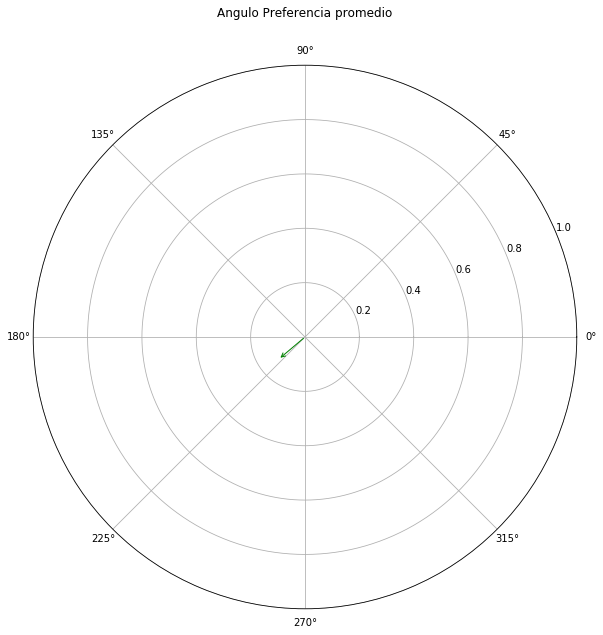

In [44]:

fig, ax = compass([np.mean(u)], [np.mean(v)],arrowprops={'color':'g'})
ax.set_title('Angulo Preferencia promedio\n')

None